# Предобработка

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
from charts import * # функции для стилизации графиков и сохранения .svg


In [118]:
df4 = pd.read_excel('4сент.xlsx')
df5 = pd.read_excel('5сент.xlsx')
df8 = pd.read_excel('8сент.xlsx')
df9 = pd.read_excel('9сент.xlsx')
df10 = pd.read_excel('10сент.xlsx')
df12 = pd.read_excel('12сент.xlsx', header=1)
df15 = pd.read_excel('15сент.xlsx', header=2)
df17 = pd.read_excel('17сент.xlsx', header=1)

df_stat_13 = pd.read_excel('Статистика.xlsx')
df_stat_17 = pd.read_excel('статистика17сент.xlsx', header=1)

df_ach = pd.read_excel('achievements.xlsx', header=1)

df_econ = pd.concat([df4, df5, df8, df9, df10, df12, df15, df17])
df_stat = pd.concat([df_stat_13, df_stat_17])

df_final = pd.read_csv('Конкурсные_списки.csv', sep=';')

In [119]:
df_ach

,Абитуриент,Группа научных специальностей,Баллы за\nиндивидуальные достижения
0,5110700,4.3. Агроинженерия и пищевые\nтехнологии,0
1,5114594,5.2. Экономика,2
2,5214160,2.3. Информационные технологии\nи телекоммуник...,0
3,5225709,5.2. Экономика,0
4,5240694,5.2. Экономика,0
...,...,...,...
136,5238794,5.2. Экономика,2
137,5239156,5.2. Экономика,0
138,5239272,5.2. Экономика,0
139,5239758,5.8. Педагогика,0


In [120]:
df_ach = df_ach.rename(columns={'Абитуриент':'id', 'Группа научных специальностей':'group','Научная специальность':'field', 'Баллы за\nиндивидуальные достижения':'additional_points'})
df_ach = df_ach[df_ach['group']=='5.2. Экономика']
df_ach = df_ach.drop('group', axis='columns')

In [121]:
df_econ.columns

Index(['УИД\nабитуриента', 'Группа научных специальностей',
       'Научная специальность', 'Баллы за\nспециальную дисциплину'],
      dtype='object')

In [122]:
df_econ = df_econ.rename(columns={'УИД\nабитуриента':'id', 'Группа научных специальностей':'group','Научная специальность':'field', 'Баллы за\nспециальную дисциплину':'econ_points'})
df_econ = df_econ.dropna()

df_econ

,id,group,field,econ_points
0,5000331.0,2.3. Информационные технологии и\nтелекоммуник...,2.3.8. Информатика и информационные процессы,неявка
1,5240694.0,5.2. Экономика,5.2.6. Менеджмент,неявка
2,5241077.0,5.6. Исторические науки,5.6.1. Отечественная история,54
3,3592181.0,5.2. Экономика,5.2.3. Региональная и отраслевая экономика (эк...,60
4,3822145.0,5.2. Экономика,5.2.3. Региональная и отраслевая экономика (эк...,неявка
...,...,...,...,...
3,4957261.0,5.2. Экономика,5.2.3. Региональная и отраслевая экономика (эк...,неявка
4,5106837.0,5.2. Экономика,5.2.6. Менеджмент,неявка
5,5207404.0,5.2. Экономика,5.2.6. Менеджмент,60
6,5218839.0,5.2. Экономика,5.2.6. Менеджмент,50


In [123]:
df_stat.columns

Index(['УИД\nабитуриента', 'Группа научных специальностей',
       'Баллы за\nстатистику'],
      dtype='object')

In [124]:
df_stat = df_stat.rename(columns={'УИД\nабитуриента':'id', 'Группа научных специальностей':'group','Баллы за\nстатистику':'stat_points'})
df_stat = df_stat.drop('group', axis='columns') # статистику сдавали только экономисты
df_stat = df_stat.dropna()

df_stat

,id,stat_points
0,4125862.0,неявка
1,4211683.0,14
2,4471556.0,неявка
3,4635379.0,неявка
4,4945398.0,неявка
...,...,...
1,5192981.0,26
2,5200700.0,8
3,5207404.0,40
4,5218347.0,24


In [125]:
df_econ['group'].unique()

array(['2.3. Информационные технологии и\nтелекоммуникации',
       '5.2. Экономика', '5.6. Исторические науки', '5.7. Философия',
       '5.8. Педагогика', '5.5. Политические науки',
       '2.3. Информационные технологии и телекоммуникации',
       '5.4. Социология', '4.3. Агроинженерия и пищевые технологии',
       '5.1. Право', '1.2. Компьютерные науки и информатика',
       '1.4. Химические науки',
       '4.3. Агроинженерия и пищевые\nтехнологии',
       '1.2. Компьютерные науки и\nинформатика', '5.3. Психология',
       '1.1. Математика и механика'], dtype=object)

In [126]:
df_econ['group'].value_counts()

group
5.2. Экономика                                        297
2.3. Информационные технологии и телекоммуникации      54
5.4. Социология                                        26
5.8. Педагогика                                        21
5.5. Политические науки                                19
1.2. Компьютерные науки и\nинформатика                 19
1.1. Математика и механика                             17
4.3. Агроинженерия и пищевые технологии                16
4.3. Агроинженерия и пищевые\nтехнологии               15
2.3. Информационные технологии и\nтелекоммуникации     14
5.1. Право                                             13
5.7. Философия                                          9
1.4. Химические науки                                   8
1.2. Компьютерные науки и информатика                   7
5.3. Психология                                         6
5.6. Исторические науки                                 5
Name: count, dtype: int64

In [127]:
df_econ = df_econ[df_econ['group']=='5.2. Экономика']
df_econ['group'].value_counts()

group
5.2. Экономика    297
Name: count, dtype: int64

In [128]:
df_final

,Место в конкурсе,ID участника,Приоритет конкурса,Основной приоритет,Подано согласие,Проходной приоритет,Сумма баллов,Баллы за ВИ,Баллы за ИД,БВИ,Преимущественное право,Статус
0,1,5056454,1,Да,Электронное,Да,111,60 40,11,—,—,—
1,2,5056746,1,Да,Электронное,Да,111,60 40,11,—,—,—
2,3,5010803,1,Да,Бумажное,Да,104,60 40,4,—,—,—
3,4,5176248,1,Да,Электронное,Да,101,59 34,8,—,—,—
4,5,5168993,1,Да,Электронное,Да,100,60 40,0,—,—,—
...,...,...,...,...,...,...,...,...,...,...,...,...
76,77,5106929,1,—,—,—,76,50 26,0,—,—,—
77,78,5226445,1,—,—,—,73,47 26,0,—,—,—
78,79,5178134,1,—,Электронное,—,72,50 22,0,—,—,—
79,80,3603334,1,—,—,—,70,44 26,0,—,—,—


In [129]:
df_final.columns

Index(['Место в конкурсе', 'ID участника', 'Приоритет конкурса',
       'Основной приоритет', 'Подано согласие', 'Проходной приоритет',
       'Сумма баллов', 'Баллы за ВИ', 'Баллы за ИД', 'БВИ',
       'Преимущественное право', 'Статус'],
      dtype='object')

In [130]:
df_final = df_final.rename(columns={'Место в конкурсе':'final_rating',
                                    'ID участника':'id',
                                    'Подано согласие':'acceptance',
                                    'Сумма баллов':'total_points',
                                    'Баллы за ВИ':'exams_points',
                                    'Баллы за ИД':'add_points'
                                   })
df_final = df_final[['id', 'final_rating', 'acceptance', 'total_points', 'exams_points', 'add_points']]
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            81 non-null     int64 
 1   final_rating  81 non-null     int64 
 2   acceptance    81 non-null     object
 3   total_points  81 non-null     int64 
 4   exams_points  81 non-null     object
 5   add_points    81 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 3.9+ KB


In [131]:
df_results = df_econ.merge(df_stat, how='left', on='id')
df_results = df_results.merge(df_ach, how='left', on='id')
print(df_results.info())
df_results

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 297 non-null    float64
 1   group              297 non-null    object 
 2   field              297 non-null    object 
 3   econ_points        297 non-null    object 
 4   stat_points        296 non-null    object 
 5   additional_points  83 non-null     float64
dtypes: float64(2), object(4)
memory usage: 14.1+ KB
None


,id,group,field,econ_points,stat_points,additional_points
0,5240694.0,5.2. Экономика,5.2.6. Менеджмент,неявка,22,0.0
1,3592181.0,5.2. Экономика,5.2.3. Региональная и отраслевая экономика (эк...,60,24,5.0
2,3822145.0,5.2. Экономика,5.2.3. Региональная и отраслевая экономика (эк...,неявка,неявка,NaN
3,3899766.0,5.2. Экономика,5.2.6. Менеджмент,неявка,неявка,NaN
4,3937142.0,5.2. Экономика,5.2.6. Менеджмент,неявка,неявка,NaN
...,...,...,...,...,...,...
292,4957261.0,5.2. Экономика,5.2.3. Региональная и отраслевая экономика (эк...,неявка,8,NaN
293,5106837.0,5.2. Экономика,5.2.6. Менеджмент,неявка,неявка,NaN
294,5207404.0,5.2. Экономика,5.2.6. Менеджмент,60,40,0.0
295,5218839.0,5.2. Экономика,5.2.6. Менеджмент,50,32,0.0


In [133]:
df_results[df_results['stat_points']=='неявка']['econ_points'].value_counts()

econ_points
неявка    154
40          3
0           3
36          2
37          1
44          1
51          1
48          1
38          1
50          1
60          1
Name: count, dtype: int64

In [135]:
print(df_results['econ_points'].value_counts())
print('')
print(df_results['stat_points'].value_counts())

econ_points
неявка    160
60         65
50          8
54          7
58          5
51          5
48          5
59          5
40          4
36          4
52          4
56          4
55          3
0           3
44          3
37          2
57          2
45          2
53          2
42          1
38          1
41          1
47          1
Name: count, dtype: int64

stat_points
неявка    169
40         25
26         11
28         11
24         10
20         10
22          9
14          8
32          6
16          6
30          6
34          6
8           6
18          5
12          3
6           2
10          1
2           1
36          1
Name: count, dtype: int64


In [137]:
df_results['econ_missing'] = (df_results['econ_points'] == 'неявка').astype(int)
df_results['stat_missing'] = (df_results['stat_points'] == 'неявка').astype(int)

df_results = df_results.copy()

df_results['econ_points'] = (
    df_results['econ_points']
    .replace('неявка', 0)  # Заменяем "неявка" на 0
    .fillna(0)             # Заменяем NaN на 0
    .astype(int)           # Преобразуем в целые числа
)
df_results['stat_points'] = (
    df_results['stat_points']
    .replace('неявка', 0)  # Заменяем "неявка" на 0
    .fillna(0)             # Заменяем NaN на 0
    .astype(int)           # Преобразуем в целые числа
)
df_results['additional_points'] = df_results['additional_points'].fillna(0).astype(int)
df_results['id'] = df_results['id'].astype(int)

C:\Users\pahan\AppData\Local\Temp\ipykernel_33992\1787935831.py:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\pahan\AppData\Local\Temp\ipykernel_33992\1787935831.py:14: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [139]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 297 non-null    int32 
 1   group              297 non-null    object
 2   field              297 non-null    object
 3   econ_points        297 non-null    int32 
 4   stat_points        297 non-null    int32 
 5   additional_points  297 non-null    int32 
 6   econ_missing       297 non-null    int32 
 7   stat_missing       297 non-null    int32 
dtypes: int32(6), object(2)
memory usage: 11.7+ KB


In [140]:
df_results['sum_points'] = df_results['econ_points'] + df_results['stat_points']  + df_results['additional_points']

In [167]:
df_results['field'].unique()

array(['5.2.6. Менеджмент',
       '5.2.3. Региональная и отраслевая экономика (экономика\nнародонаселения и экономика труда)',
       '5.2.3. Региональная и отраслевая экономика (экономика\nстроительства и операций с недвижимостью)',
       '5.2.3. Региональная и отраслевая экономика (экономика\nинноваций)',
       '5.2.3. Региональная и отраслевая экономика (экономика\nприродопользования и землеустройства)',
       '5.2.7. Государственное и муниципальное управление',
       '5.2.3. Региональная и отраслевая экономика (бухгалтерский\nучет, аудит и экономическая статистика)',
       '5.2.3. Региональная и отраслевая экономика (экономика\nпромышленности)',
       '5.2.3. Региональная и отраслевая экономика (бухгалтерский учет, аудит и экономическая статистика)',
       '5.2.1. Экономическая теория', '5.2.4. Финансы',
       '5.2.3. Региональная и отраслевая экономика (маркетинг)',
       '5.2.2. Математические, статистические и инструментальные методы в экономике',
       '5.2.3. Регион

In [170]:
df_results['field_short'] = df_results['field']

df_results['field_short'] = df_results['field_short'].replace({
        '5.2.3. Региональная и отраслевая экономика (экономика\nнародонаселения и экономика труда)':'Экономика народонаселения и труда',
        '5.2.3. Региональная и отраслевая экономика (экономика\nстроительства и операций с недвижимостью)':'Экономика строительства и операций с недвижимостью',
        '5.2.6. Менеджмент':'Менеджмент',
        '5.2.3. Региональная и отраслевая экономика (экономика\nинноваций)':'Экономика инноваций',
        '5.2.3. Региональная и отраслевая экономика (экономика\nприродопользования и землеустройства)':'Экономика природопользования и землеустройства',
        '5.2.3. Региональная и отраслевая экономика (экономика\nпромышленности)':'Экономика промышленности',
        '5.2.7. Государственное и муниципальное управление':'Государственное и муниципальное управление',
        '5.2.3. Региональная и отраслевая экономика (бухгалтерский\nучет, аудит и экономическая статистика)':'Бухгалтерский учет, аудит и экономическая статистика',
        '5.2.3. Региональная и отраслевая экономика (бухгалтерский учет, аудит и экономическая статистика)':'Бухгалтерский учет, аудит и экономическая статистика',
        '5.2.4. Финансы':'Финансы',
        '5.2.3. Региональная и отраслевая экономика (маркетинг)':'Маркетинг',
        '5.2.3. Региональная и отраслевая экономика (экономическая безопасность)':'Экономическая безопасность',
        '5.2.2. Математические, статистические и инструментальные методы в экономике':'Математические, статистические и инструментальные методы в экономике',
        '5.2.1. Экономическая теория':'Экономическая теория',
        '5.2.3. Региональная и отраслевая экономика (региональная экономика)':'Региональная экономика',
        '5.2.3. Региональная и отраслевая экономика (экономическая\nбезопасность)':'Экономическая безопасность',
        '5.2.2. Математические, статистические и инструментальные\nметоды в экономике':'Математические, статистические и инструментальные методы в экономике',
        '5.2.3. Региональная и отраслевая экономика (стандартизация и управление качеством продукции)':'Стандартизация и управление качеством продукции',
        '5.2.3. Региональная и отраслевая экономика (региональная\nэкономика)':'Региональная экономика',
        '5.2.5. Мировая экономика':'Мировая экономика',
        '5.2.3. Региональная и отраслевая экономика (транспорт и логистика)':'Транспорт и логистика',
        '5.2.3. Региональная и отраслевая экономика (экономика сферы услуг)':'Экономика сферы услуг',
        '5.2.3. Региональная и отраслевая экономика (экономика строительства и операций с недвижимостью)':'Экономика строительства и операций с недвижимостью'
})

In [171]:
df_results['field_short'].unique()

array(['Менеджмент', 'Экономика народонаселения и труда',
       'Экономика строительства и операций с недвижимостью',
       'Экономика инноваций',
       'Экономика природопользования и землеустройства',
       'Государственное и муниципальное управление',
       'Бухгалтерский учет, аудит и экономическая статистика',
       'Экономика промышленности', 'Экономическая теория', 'Финансы',
       'Маркетинг',
       'Математические, статистические и инструментальные методы в экономике',
       'Экономическая безопасность', 'Региональная экономика',
       'Стандартизация и управление качеством продукции',
       'Транспорт и логистика', 'Мировая экономика',
       'Экономика сферы услуг'], dtype=object)

# Рейтинги

In [172]:
ratings = df_results[['id', 'sum_points']].sort_values(by='sum_points', ascending=False).reset_index(drop=True)
ratings.head(44)

,id,sum_points
0,5056454,111
1,5056746,111
2,5010803,104
3,5176248,101
4,5225709,100
5,5222094,100
6,5218600,100
7,5168993,100
8,4954953,100
9,5144117,100


# Исследование

- построить график распределения баллов по статистике и экономике
- посмотреть, с какого направления больше сорокабалльников
- посмотреть, какая доля получивших 60 по каждой специальности
- посмотреть, какие специальности лучше решили статистику а какие хуже
- построить воронку, чтобы понять, сколько людей отсеивались с каждого этапа

## Графики распределения баллов по статистике и экономике

In [174]:
df_results.columns

Index(['id', 'group', 'field', 'econ_points', 'stat_points',
       'additional_points', 'econ_missing', 'stat_missing', 'sum_points',
       'field_short', 'final_rating', 'acceptance', 'total_points',
       'exams_points', 'add_points'],
      dtype='object')

C:\Users\pahan\Documents\Jupyter\Studies\Экзамены в аспу\charts.py:79: UserWarning:

The figure layout has changed to tight



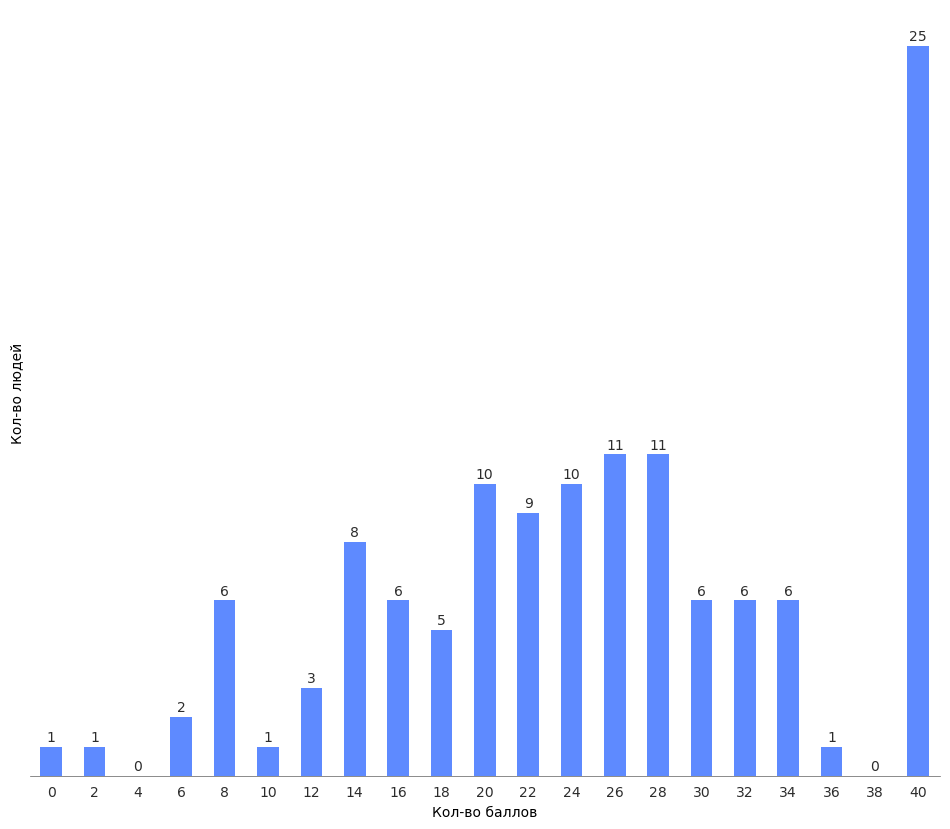

График сохранен как: распределение_результатов_по_статистике.svg


In [180]:
# Создаем полный диапазон от 0 до 40
full_index = range(0, 41, 2)

df_stat_points = df_results[(df_results['stat_missing']==0)]['stat_points'].value_counts().sort_index().reindex(full_index, fill_value=0)

ax = df_stat_points.sort_index().plot(
    kind='bar', 
    figsize=(12, 6),
    color='steelblue',
    edgecolor='none'  # Убираем черные границы бара
)

# Добавляем значения наверху каждого бара
for i, v in enumerate(df_stat_points.sort_index()):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

plt.title('Распределение результатов по статистике', fontsize=14)
plt.xlabel('Кол-во баллов', fontsize=12)
plt.ylabel('Кол-во людей', fontsize=12)
plt.xticks(rotation=0)
plt.yticks([])

# Убираем рамку (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

# Убираем деления (ticks)
ax.tick_params(axis='y', left=False)  # Убираем деления на оси Y
ax.tick_params(axis='x', bottom=False)  # Убираем деления на оси X

# Убираем сетку если она есть
ax.grid(False)

plt.tight_layout()
styled_ax = style_telegram_vertical_barchart(ax, 'Распределение результатов по статистике')

plt.show()

In [181]:
df_stat_points.sum()

128

C:\Users\pahan\Documents\Jupyter\Studies\Экзамены в аспу\charts.py:79: UserWarning:

The figure layout has changed to tight



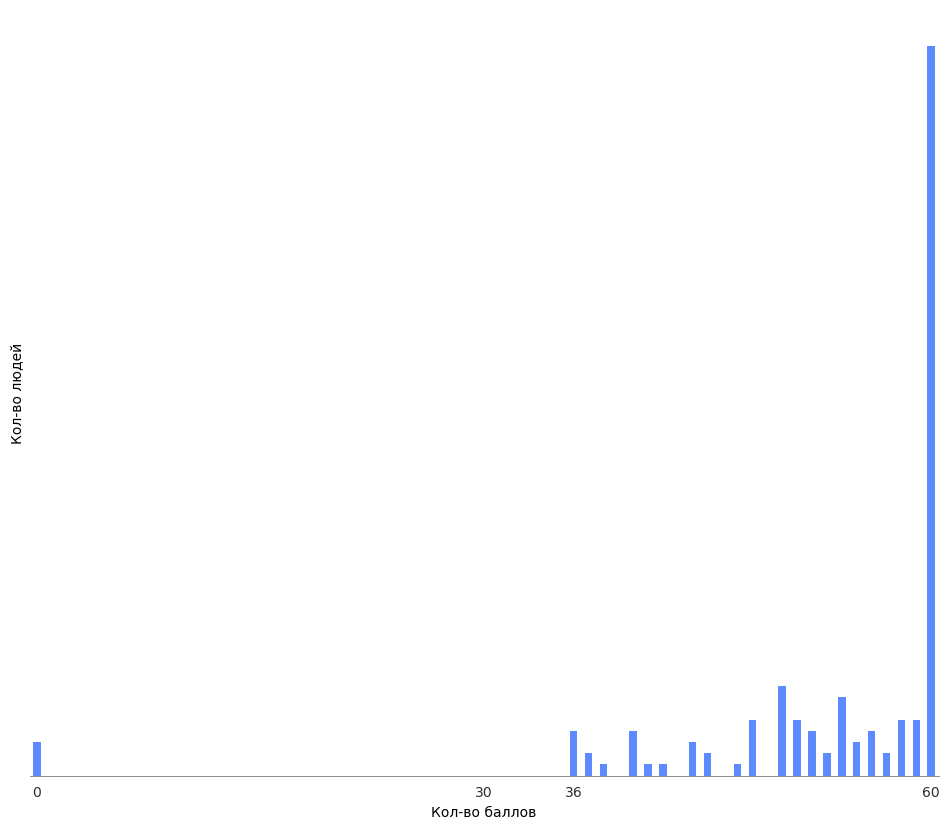

График сохранен как: распределение_результатов_по_специальности.svg


In [191]:
# Создаем полный диапазон от 0 до 60
full_index = range(0, 61, 1)
df_econ_points = df_results[(df_results['econ_missing']==0)]['econ_points'].value_counts().sort_index().reindex(full_index, fill_value=0)

ax = df_econ_points.sort_index().plot(
    kind='bar', 
    figsize=(12, 6),
    color='steelblue',
    edgecolor='none'  # Убираем черные границы бара
)

plt.title('Распределение результатов по специальности (все направления группы 5.2 Экономика)', fontsize=14)
plt.xlabel('Кол-во баллов', fontsize=12)
plt.ylabel('Кол-во людей', fontsize=12)
plt.xticks(rotation=0)
plt.xticks(ticks=[0, 30, 36, 60], labels=['0', '30', '36', '60'], rotation=0)
plt.yticks([])

# Убираем рамку (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

# Убираем деления (ticks)
ax.tick_params(axis='y', left=False)
ax.tick_params(axis='x', bottom=False)

# Убираем сетку если она есть
ax.grid(False)

plt.tight_layout()

styled_ax = style_telegram_vertical_barchart(ax, 'Распределение результатов по специальности')

plt.show()

In [186]:
df_econ_points.sum()

137

In [189]:
with pd.option_context("display.max_rows", 1000):
    display(df_econ_points)

econ_points
0      3
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     4
37     2
38     1
39     0
40     4
41     1
42     1
43     0
44     3
45     2
46     0
47     1
48     5
49     0
50     8
51     5
52     4
53     2
54     7
55     3
56     4
57     2
58     5
59     5
60    65
Name: count, dtype: int64

## Какая доля получивших 60 по каждой специальности

C:\Users\pahan\Documents\Jupyter\Studies\Экзамены в аспу\charts.py:166: UserWarning:

The figure layout has changed to tight



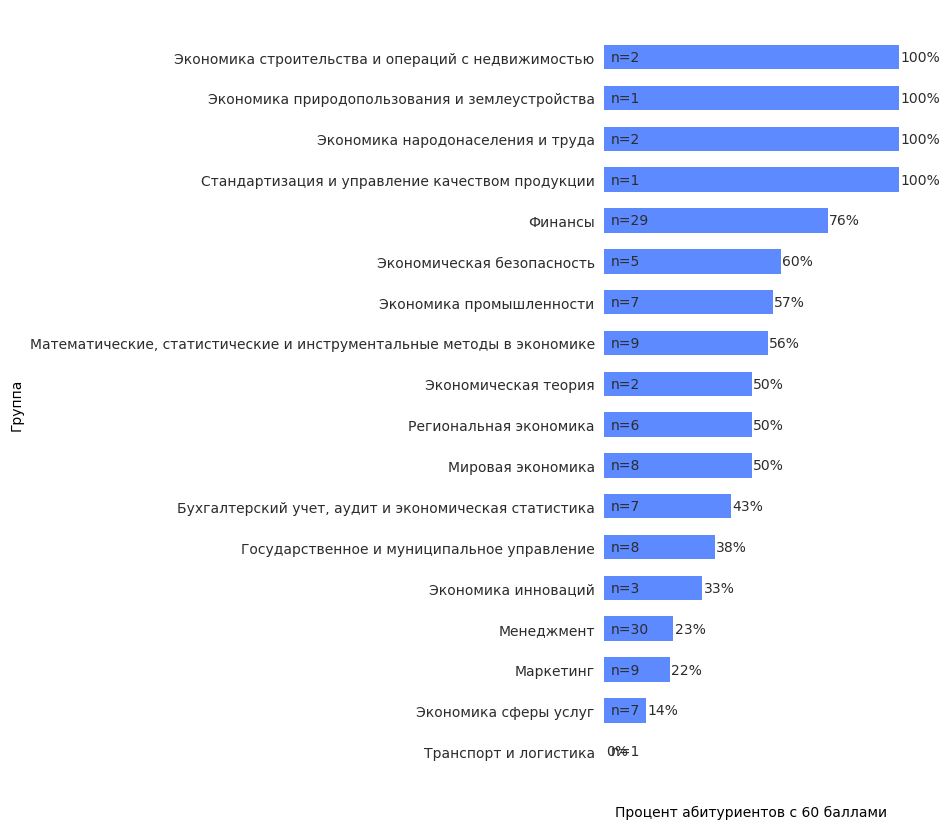

График сохранен как: процент_с_60_баллами.svg


In [201]:
# Подготовка данных
percentage_data = (df_results[(df_results['econ_missing']==0)].groupby('field_short')['econ_points']
                     .apply(lambda x: (x == 60).mean() * 100)
                     .sort_values(ascending=True))

# Получаем количество студентов в каждой группе
group_counts = df_results[(df_results['econ_missing']==0)]['field_short'].value_counts()
# Сортируем в том же порядке, что и percentage_data
group_counts = group_counts.loc[percentage_data.index]

# Строим горизонтальный барчарт
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(percentage_data.index, percentage_data.values, 
               color='#5E8AFF', height=0.6, edgecolor='none')

# Добавляем значения процентов (справа от баров)
for i, v in enumerate(percentage_data.values):
    ax.text(v + 0.5, i, f'{v:.0f}%', ha='left', va='center', 
            fontsize=11, color='#2C2C2C', fontweight='normal')

# Добавляем количество студентов (внутри баров слева)
for i, (v, count) in enumerate(zip(percentage_data.values, group_counts.values)):
    # Размещаем текст внутри бара, если процент достаточно большой
    if v > 15:  # Если бар достаточно широкий, текст внутри
        ax.text(2, i, f'n={count}', ha='left', va='center', 
                fontsize=10, color='white', fontweight='normal')
    else:  # Если бар узкий, текст слева от бара
        ax.text(2, i, f'n={count}', ha='left', va='center', 
                fontsize=10, color='white', fontweight='normal')

# Базовые настройки
ax.set_xlabel('Процент абитуриентов с 60 баллами', fontsize=12)
ax.set_ylabel('Группа', fontsize=12)
ax.set_xlim(0, min(percentage_data.max() * 1.2, 100))  # Ограничиваем максимум 100%

# Убираем ненужные элементы
ax.tick_params(axis='y', left=False)
ax.grid(False)

plt.tight_layout()

# Применяем стилизацию (без заголовка, как вы requested)
styled_ax = style_telegram_horizontal_barchart(ax, 'Процент с 60 баллами')

## Средний балл по статистике по каждой специальности

C:\Users\pahan\Documents\Jupyter\Studies\Экзамены в аспу\charts.py:166: UserWarning:

The figure layout has changed to tight



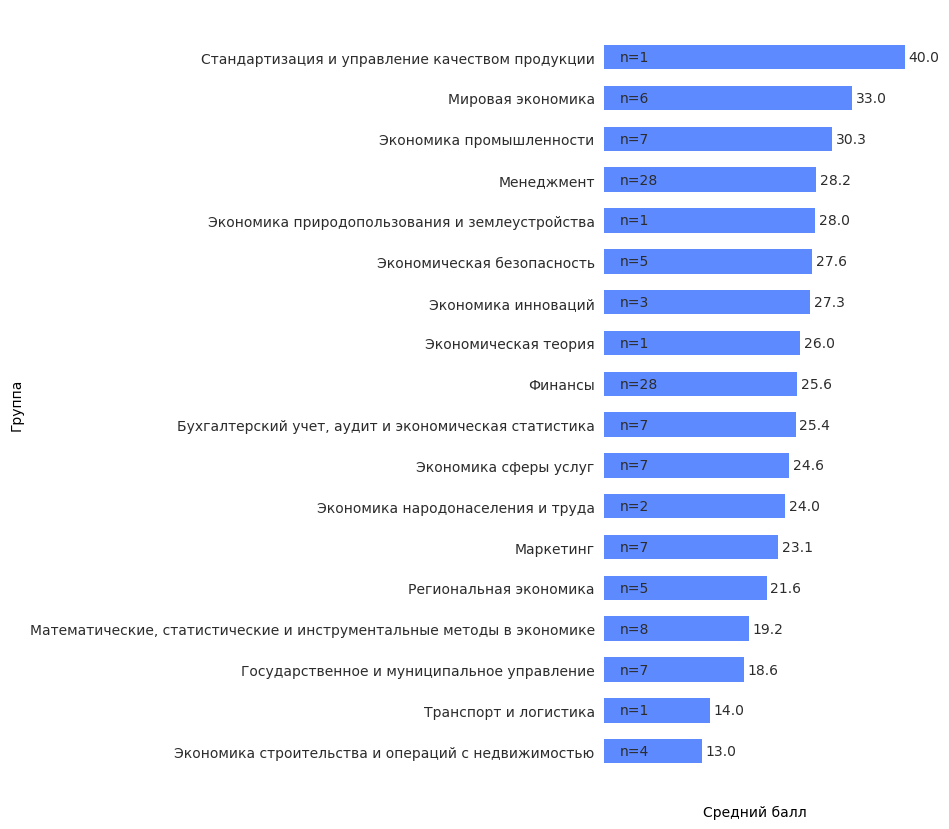

График сохранен как: средний_балл.svg


In [202]:
# Подготовка данных
avg_data = (df_results[(df_results['stat_missing']==0)].groupby('field_short')['stat_points']
                     .mean()
                     .sort_values(ascending=True))

# Получаем количество студентов в каждой группе
group_counts = df_results[(df_results['stat_missing']==0)]['field_short'].value_counts()
# Сортируем в том же порядке, что и percentage_data
group_counts = group_counts.loc[avg_data.index]

# Строим горизонтальный барчарт
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(avg_data.index, avg_data.values, 
               color='#5E8AFF', height=0.6, edgecolor='none')

# Добавляем значения баллов (справа от баров)
for i, v in enumerate(avg_data.values):
    ax.text(v + 0.5, i, f'{v:.1f}', ha='left', va='center', 
            fontsize=11, color='#2C2C2C', fontweight='normal')

# Добавляем количество студентов (внутри баров слева)
for i, (v, count) in enumerate(zip(avg_data.values, group_counts.values)):
    # Размещаем текст внутри бара, если процент достаточно большой
    if v > 15:  # Если бар достаточно широкий, текст внутри
        ax.text(2, i, f'n={count}', ha='left', va='center', 
                fontsize=10, color='white', fontweight='normal')
    else:  # Если бар узкий, текст слева от бара
        ax.text(2, i, f'n={count}', ha='left', va='center', 
                fontsize=10, color='white', fontweight='normal')

# Базовые настройки
ax.set_xlabel('Средний балл', fontsize=12)
ax.set_ylabel('Группа', fontsize=12)
ax.set_xlim(0, 40)  # Ограничиваем максимум 100%

# Убираем ненужные элементы
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='y', left=False)
ax.grid(False)

plt.tight_layout()

# Применяем стилизацию (без заголовка, как вы requested)
styled_ax = style_telegram_horizontal_barchart(ax, 'Средний балл')

## Сколько людей дошли до экзамена? Сколько было неявок на каждом этапе?

In [203]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 297 non-null    int32  
 1   group              297 non-null    object 
 2   field              297 non-null    object 
 3   econ_points        297 non-null    int32  
 4   stat_points        297 non-null    int32  
 5   additional_points  297 non-null    int32  
 6   econ_missing       297 non-null    int32  
 7   stat_missing       297 non-null    int32  
 8   sum_points         297 non-null    int32  
 9   field_short        297 non-null    object 
 10  final_rating       83 non-null     float64
 11  acceptance         83 non-null     object 
 12  total_points       83 non-null     float64
 13  exams_points       83 non-null     object 
 14  add_points         83 non-null     float64
dtypes: float64(3), int32(7), object(5)
memory usage: 26.8+ KB


In [204]:
df_results['acceptance'].value_counts()

acceptance
Электронное    54
Бумажное       16
—              13
Name: count, dtype: int64

In [226]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Пороговые значения
ECON_THRESHOLD = 36
STAT_THRESHOLD = 22

# Считаем количество на каждом этапе с детализацией отсева
funnel_stages = []
funnel_counts = []
funnel_colors = []

# Этап 1: Все поступающие
total_applicants = len(df_results)
funnel_stages.append('Все поступающие')
funnel_counts.append(total_applicants)

# Этап 2: Экзамен по экономике
econ_present = len(df_results[df_results['econ_missing'] == 0])
econ_absent = len(df_results[df_results['econ_missing'] == 1])
econ_below_threshold = len(df_results[(df_results['econ_missing'] == 0) & (df_results['econ_points'] < ECON_THRESHOLD)])
econ_passed = len(df_results[(df_results['econ_missing'] == 0) & (df_results['econ_points'] >= ECON_THRESHOLD)])

# Добавляем подэтапы для экономики
funnel_stages.extend([
    'Сдали экономику (≥36)',
    'Не сдали экономику (<36)',
    'Не явились на экономику'
])
funnel_counts.extend([econ_passed, econ_below_threshold, econ_absent])

# Этап 3: Экзамен по статистике
# Те, кто прошел экономику и сдал статистику
stat_present_passed = len(df_results[
    (df_results['econ_missing'] == 0) & 
    (df_results['econ_points'] >= ECON_THRESHOLD) &
    (df_results['stat_missing'] == 0) &
    (df_results['stat_points'] >= STAT_THRESHOLD)
])

# Те, кто прошел экономику, но не сдал статистику (ниже порога)
stat_below_threshold = len(df_results[
    (df_results['econ_missing'] == 0) & 
    (df_results['econ_points'] >= ECON_THRESHOLD) &
    (df_results['stat_missing'] == 0) &
    (df_results['stat_points'] < STAT_THRESHOLD)
])

# Те, кто прошел экономику, но не явился на статистику
stat_absent_passed = len(df_results[
    (df_results['econ_missing'] == 0) & 
    (df_results['econ_points'] >= ECON_THRESHOLD) &
    (df_results['stat_missing'] == 1)
])

# Те, кто не прошел экономику, но сдал статистику (отдельная категория)
stat_only_present = len(df_results[
    (df_results['econ_missing'] == 1) &
    (df_results['stat_missing'] == 0)
])

# Добавляем подэтапы для статистики
funnel_stages.extend([
    'Сдали статистику (≥22)',
    'Не сдали статистику (<22)',
    'Не явились на статистику',
    'Сдали только статистику\n(не явились на экономику)'
])
funnel_counts.extend([
    stat_present_passed, 
    stat_below_threshold, 
    stat_absent_passed, 
    stat_only_present
])

# Этап 4: Итоговый список
final_list = len(df_results[df_results['total_points'].notna()])
funnel_stages.append('Вошли в итоговый список')
funnel_counts.append(final_list)
funnel_colors.append('#5E8AFF')

# Этап 5: Подача согласия
accepted = len(df_results[
    (df_results['acceptance'].notna()) & 
    (df_results['acceptance'] != '—')
])
funnel_stages.append('Подали согласие на зачисление')
funnel_counts.append(accepted)

# Этап 6: Бюджетные места
taken = 43
funnel_stages.append('Зачислены на бюджет')
funnel_counts.append(taken)

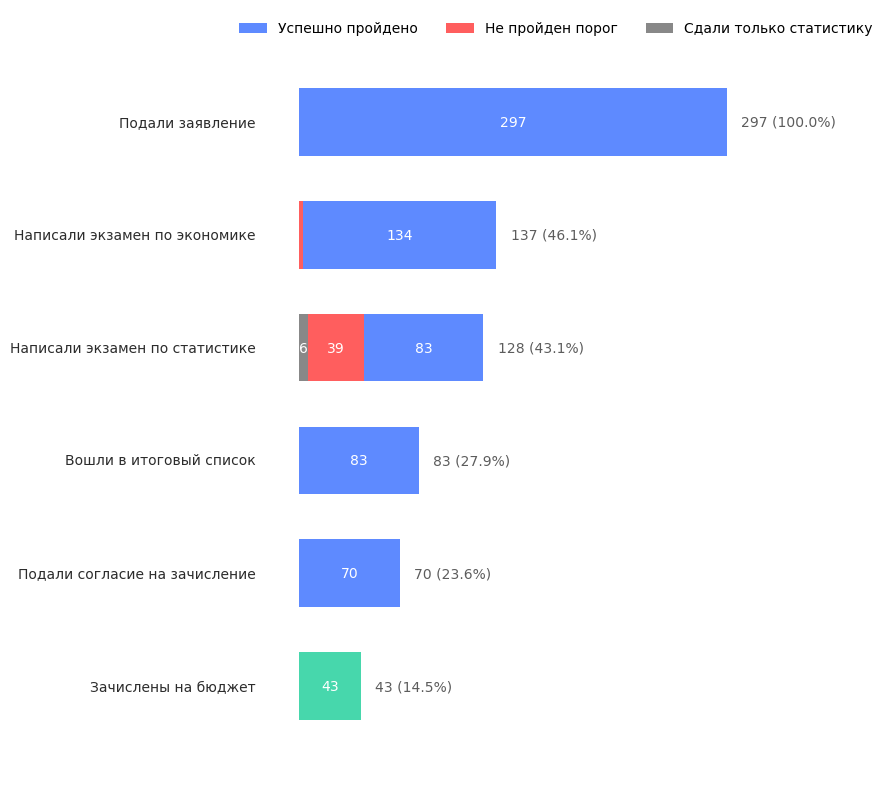

In [227]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

# Создаем горизонтальный накопительный барчарт
fig, ax = plt.subplots(figsize=(14, 8))

# Новые этапы
stages = [
    'Зачислены на бюджет',
    'Подали согласие на зачисление',
    'Вошли в итоговый список',
    'Написали экзамен по статистике',
    'Написали экзамен по экономике', 
    'Подали заявление'
]

# Составляющие для каждого этапа (в порядке от последнего к первому)
components = [
    [taken], 
    [accepted],
    [final_list],
    [stat_only_present, stat_below_threshold, stat_present_passed],
    [econ_below_threshold, econ_passed],
    [total_applicants]
]

colors = [
    ['#47D7AC'],
    ['#5E8AFF'],
    ['#5E8AFF'],
    ['#888888', '#FF5E5E', '#5E8AFF'], 
    ['#FF5E5E', '#5E8AFF'],
    ['#5E8AFF']
]

y_pos = np.arange(len(stages))
bar_height = 0.6

for i, (stage, comp_counts, comp_colors) in enumerate(zip(stages, components, colors)):
    left = 0
    for count, color in zip(comp_counts, comp_colors):
        ax.barh(y_pos[i], count, height=bar_height, left=left, color=color, 
                alpha=1)
        
        if count > 5: 
            ax.text(left + count/2, y_pos[i], f'{count}', ha='center', va='center', 
                    fontsize=9, color='white', fontweight='normal')
        
        left += count
    
    ax.text(-30, y_pos[i], stage, ha='right', va='center', 
            fontsize=11, color='#2C2C2C', fontweight='normal')
    
    # Общее количество справа
    total_stage = sum(comp_counts)
    percentage = (total_stage / total_applicants) * 100
    ax.text(total_stage + 10, y_pos[i], f'{total_stage} ({percentage:.1f}%)', 
            ha='left', va='center', fontsize=10, color='#5C5C5C')

# Настройки внешнего вида
ax.set_xlim(-50, total_applicants + 80)
ax.set_ylim(-1, len(stages))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='y', left=False, labelleft=False)
ax.tick_params(axis='x', bottom=False, labelbottom=False)

legend_elements = [
    plt.Rectangle((0,0),1,1, facecolor='#5E8AFF', alpha=1, label='Успешно пройдено'),
    plt.Rectangle((0,0),1,1, facecolor='#FF5E5E', alpha=1, label='Не пройден порог'),
    plt.Rectangle((0,0),1,1, facecolor='#888888', alpha=1, label='Сдали только статистику')
]
ax.legend(handles=legend_elements, loc='upper left', frameon=False, fontsize=10, ncol=4)

inter_font = fm.findfont(fm.FontProperties(family=['Inter']))
font_prop = fm.FontProperties(fname=inter_font)
ax.title.set_fontproperties(font_prop)
ax.xaxis.label.set_fontproperties(font_prop)
ax.yaxis.label.set_fontproperties(font_prop)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(font_prop)

for text in ax.texts:
    text.set_fontproperties(font_prop)
    
fig.set_size_inches(8.6, 8.2)  # 9.6*100 = 960, 8.4*100 = 840
fig.set_dpi(100)
plt.tight_layout()

# Сохраняем в SVG
plt.savefig('funnel.svg', format='svg', bbox_inches='tight', dpi=300, transparent=True)

plt.show()

## Как менялся рейтинг поэтапно?

In [150]:
df_results

,id,group,field,econ_points,stat_points,additional_points,econ_missing,stat_missing,sum_points,field_short
0,5240694,5.2. Экономика,5.2.6. Менеджмент,0,22,0,1,0,22,Менеджмент
1,3592181,5.2. Экономика,5.2.3. Региональная и отраслевая экономика (эк...,60,24,5,0,0,89,Экономика народонаселения и труда
2,3822145,5.2. Экономика,5.2.3. Региональная и отраслевая экономика (эк...,0,0,0,1,1,0,Экономика строительства и операций с недвижимо...
3,3899766,5.2. Экономика,5.2.6. Менеджмент,0,0,0,1,1,0,Менеджмент
4,3937142,5.2. Экономика,5.2.6. Менеджмент,0,0,0,1,1,0,Менеджмент
...,...,...,...,...,...,...,...,...,...,...
292,4957261,5.2. Экономика,5.2.3. Региональная и отраслевая экономика (эк...,0,8,0,1,0,8,5.2.3. Региональная и отраслевая экономика (эк...
293,5106837,5.2. Экономика,5.2.6. Менеджмент,0,0,0,1,1,0,Менеджмент
294,5207404,5.2. Экономика,5.2.6. Менеджмент,60,40,0,0,0,100,Менеджмент
295,5218839,5.2. Экономика,5.2.6. Менеджмент,50,32,0,0,0,82,Менеджмент


In [151]:
df_final

,id,final_rating,acceptance,total_points,exams_points,add_points
0,5056454,1,Электронное,111,60 40,11
1,5056746,2,Электронное,111,60 40,11
2,5010803,3,Бумажное,104,60 40,4
3,5176248,4,Электронное,101,59 34,8
4,5168993,5,Электронное,100,60 40,0
...,...,...,...,...,...,...
76,5106929,77,—,76,50 26,0
77,5226445,78,—,73,47 26,0
78,5178134,79,Электронное,72,50 22,0
79,3603334,80,—,70,44 26,0


In [152]:
df_results = df_results.merge(df_final, how='left', on='id')

In [153]:
df_results[df_results['final_rating']<44].sort_values(by='final_rating')

,id,group,field,econ_points,stat_points,additional_points,econ_missing,stat_missing,sum_points,field_short,final_rating,acceptance,total_points,exams_points,add_points
183,5056454,5.2. Экономика,5.2.4. Финансы,60,40,11,0,0,111,Финансы,1.0,Электронное,111.0,60 40,11.0
184,5056746,5.2. Экономика,5.2.4. Финансы,60,40,11,0,0,111,Финансы,2.0,Электронное,111.0,60 40,11.0
174,5010803,5.2. Экономика,5.2.3. Региональная и отраслевая экономика (ст...,60,40,4,0,0,104,Стандартизация и управление качеством продукции,3.0,Бумажное,104.0,60 40,4.0
86,5176248,5.2. Экономика,5.2.3. Региональная и отраслевая экономика (бу...,59,34,8,0,0,101,"Бухгалтерский учет, аудит и экономическая стат...",4.0,Электронное,101.0,59 34,8.0
273,5168993,5.2. Экономика,5.2.5. Мировая экономика,60,40,0,0,0,100,Мировая экономика,5.0,Электронное,100.0,60 40,0.0
274,5178121,5.2. Экономика,5.2.4. Финансы,60,40,0,0,0,100,Финансы,6.0,Электронное,100.0,60 40,0.0
97,5222094,5.2. Экономика,5.2.3. Региональная и отраслевая экономика (эк...,60,40,0,0,0,100,Экономика промышленности,7.0,Бумажное,100.0,60 40,0.0
76,5073152,5.2. Экономика,5.2.6. Менеджмент,60,40,0,0,0,100,Менеджмент,8.0,Электронное,100.0,60 40,0.0
16,5050325,5.2. Экономика,5.2.6. Менеджмент,60,40,0,0,0,100,Менеджмент,9.0,Электронное,100.0,60 40,0.0
64,4954953,5.2. Экономика,5.2.3. Региональная и отраслевая экономика (эк...,60,40,0,0,0,100,Экономика промышленности,10.0,Бумажное,100.0,60 40,0.0


In [155]:
# Сортируем по каждому этапу и определяем кто в топ-44
df = df_results.copy()
budget_places = 44

# Этап 0: Только экономика
df_sorted_econ = df.sort_values('econ_points', ascending=False)
top44_econ = set(df_sorted_econ.head(budget_places)['id'])

# Этап 1: Экономика + Статистика
df['econ_stat_sum'] = df['econ_points'] + df['stat_points']
df_sorted_econ_stat = df.sort_values('econ_stat_sum', ascending=False)
top44_econ_stat = set(df_sorted_econ_stat.head(budget_places)['id'])

# Этап 2: Все баллы (total_points)
df_sorted_total = df.sort_values('total_points', ascending=False)
top44_total = set(df_sorted_total.head(budget_places)['id'])

# Этап 3: Финальный рейтинг (исключая льготников)
df_sorted_final = df.sort_values('final_rating')
top44_final = set(df_sorted_final.head(budget_places)['id'])


# Считаем переходы между этапами
# Этап 0 -> Этап 1
stayed_0_1 = len(top44_econ & top44_econ_stat)
left_0_1 = len(top44_econ) - stayed_0_1
new_0_1 = len(top44_econ_stat - top44_econ)

# Этап 1 -> Этап 2  
stayed_1_2 = len(top44_econ_stat & top44_total)
left_1_2 = len(top44_econ_stat) - stayed_1_2
new_1_2 = len(top44_total - top44_econ_stat)

# Этап 2 -> Этап 3
stayed_2_3 = len(top44_total & top44_final)
left_2_3 = len(top44_total) - stayed_2_3 + 1
new_2_3 = len(top44_final - top44_total) - 1

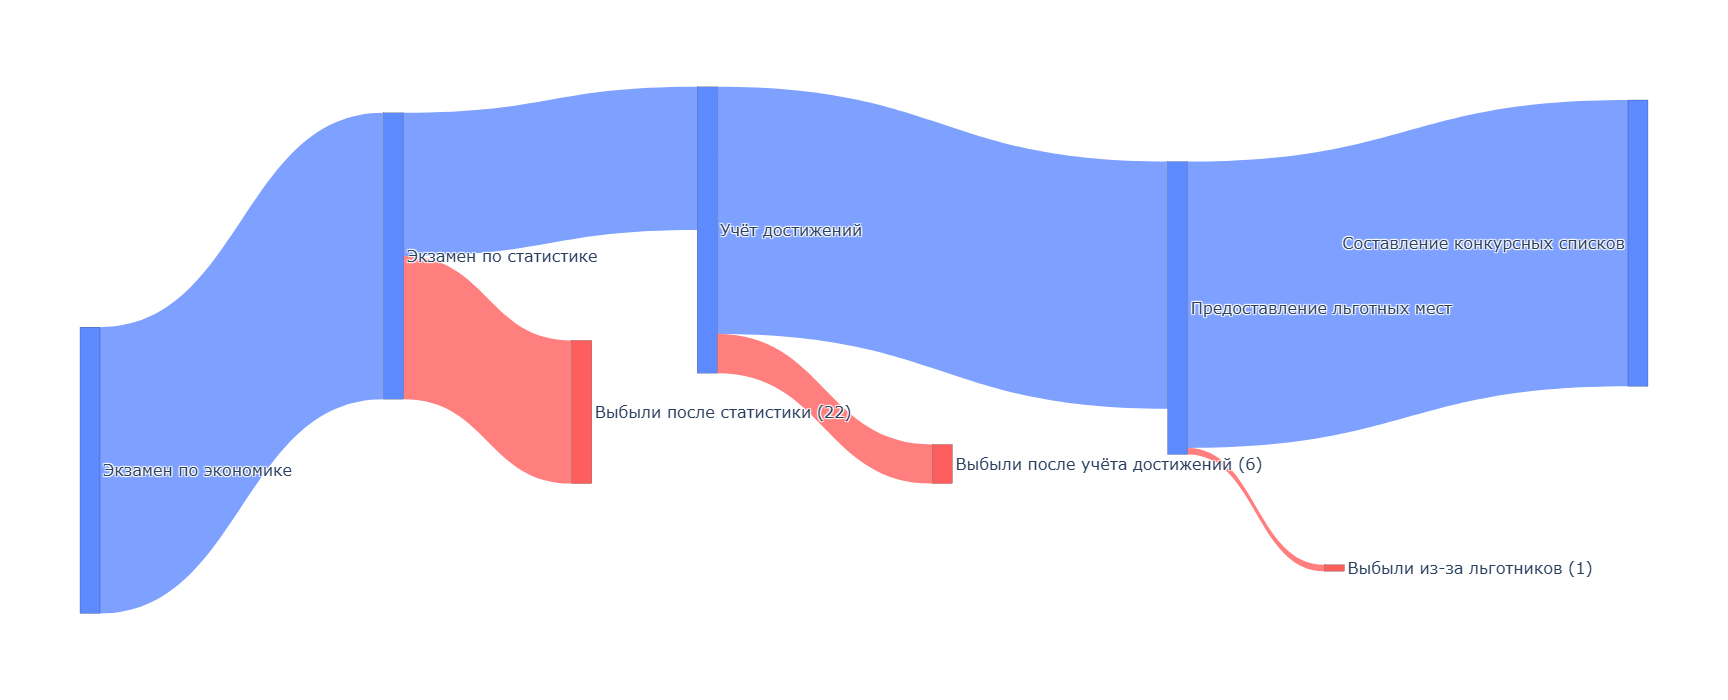

In [165]:
import plotly.graph_objects as go

# Структура с 6 этапами (добавлен начальный этап "Экзамен по экономике")
labels = ['Экзамен по экономике', 'Экзамен по статистике', 'Выбыли после экономики', 
          'Учёт достижений', 'Выбыли после статистики',
          'Составление конкурсных списков', 'Выбыли после учёта достижений', 
          'Предоставление льготных мест', 'Выбыли из-за льготников']

# Добавляем переходы от нового этапа 0 к этапу 1 (все 44 человека переходят)
source = [0, 0, 1, 1, 3, 3, 5, 5]  # Переходы из состояний
target = [1, 2, 3, 4, 5, 6, 7, 8]  # В соответствующие состояния следующего этапа
value = [44, 0, stayed_0_1, left_0_1, stayed_1_2, left_1_2, stayed_2_3, left_2_3]

# Обновляем подписи с количеством выбывших
labels_with_counts = [
    'Экзамен по экономике',
    'Экзамен по статистике', 
    f'Выбыли после экономики\n({0})',
    'Учёт достижений',
    f'Выбыли после статистики\n({left_0_1})',
    'Предоставление льготных мест',
    f'Выбыли после учёта достижений\n({left_1_2})',
    'Составление конкурсных списков',
    f'Выбыли из-за льготников\n({left_2_3})'
]

# Задаем точные позиции для каждого узла
node_x = [0,   0.2, 0.4,  0.32, 0.7,  0.55, 1,  0.8, 0.9]   # X координаты
node_y = [0, 0.3, 0.25,  0.6, 0.4,  0.7, 0,  0.9, 0.9]   # Y координаты (основные этапы выше, выбывшие ниже)

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.2),
        label=labels_with_counts,
        color=['#5E8AFF', '#5E8AFF', '#FF5E5E', '#5E8AFF', '#FF5E5E', 
               '#5E8AFF', '#FF5E5E', '#5E8AFF', '#FF5E5E'],
        x=node_x,  # Задаем X координаты
        y=node_y   # Задаем Y координаты
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=['rgba(94, 138, 255, 0.8)', 'rgba(255, 94, 94, 0.0)',  # Прозрачный для нулевого потока
               'rgba(94, 138, 255, 0.8)', 'rgba(255, 94, 94, 0.8)',
               'rgba(94, 138, 255, 0.8)', 'rgba(255, 94, 94, 0.8)',
               'rgba(94, 138, 255, 0.8)', 'rgba(255, 94, 94, 0.8)']
    )
)])

fig.update_layout(
    font_size=16,
    width=1400,
    height=700  # Увеличил высоту для вертикального расположения
)

# Показываем график
fig.show()

In [166]:
fig.write_image("admission_sankey.svg")